# 2.3.0 SciPy - přehled funkcí

Scipy je knihovna poskytující monožství základních algoritmů pro numerické výpočty a zpracování dat. Je úzce navázána na NumPy. Většina algoritmů jsou standardní implementace v C a Fortranu přičemž SciPy k nim poskytuje jednotné a elegantní Pythoní rozhraní.

Přehled funkcí s odkazy do dokumentace:

- [**Speciální matematické funkce**](https://docs.scipy.org/doc/scipy/tutorial/special.html) 
  [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) 
  
  Beselovy funkce, eliptické funkce, jejich derivace a další 

- [**Numerická integrace řešení ODE**](https://docs.scipy.org/doc/scipy/tutorial/integrate.html)
  [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate)
  
  - adaptivní numerická integrace funkcí v 1D, 2D, 3D. Ve 2D a 3D jsou hranice oblastí dané funkcemi.  
  - integrace diferenciálních rovnic: počáteční úlohy `solve_ivp`, okrajové úlohy `solve_bvp`

- [**Optimalizace a nelineární rovnice**](https://docs.scipy.org/doc/scipy/tutorial/optimize.html)
  [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)
  
  Gradientní (lokální) metody pro nevázané a vázané minimalizační problémy, 'globální' optimalizace, 
  řešení soustav nelineární algebraických rovnic
  
- [**Interpolace**](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html)
  [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate)
  
  Interpolace a aproximace polynomy a spline funkcemi v 1D (a 2D).

- [**Fourierova transformace**](https://docs.scipy.org/doc/scipy/tutorial/fftpack.html)
  [`scipy.fftpack`](https://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack)
  
  Diskrétní fuourierova transformace a její varianty, diskrétní konvoluce.
  
- [**Zpracování signálu**](https://docs.scipy.org/doc/scipy/tutorial/signal.html)
  [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal)
  
  Filtry, konvoluce, spektrum, ...
  
- [**Lineární algebra**](https://docs.scipy.org/doc/scipy/tutorial/linalg.html)
  [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)
  
  Funkce z `numpy.linalg` plus podpora pokročilejších algoritmů. 

    - [**Vlastní čísla pro řídké matice (ARPACK)**](https://docs.scipy.org/doc/scipy/tutorial/arpack.html)  
      [`scipy.sparse.linalg.eigs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html#scipy.sparse.linalg.eigsscipy.)

- [**Práce s prostorovými daty**](https://docs.scipy.org/doc/scipy/tutorial/spatial.html)
  [`scipy.spatial`](https://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial)
  
  Triangulace, Voronoi diagramy, konvexní obaly
  
- [**Statistika a pravděpodobnost**](https://docs.scipy.org/doc/scipy/tutorial/stats.html)
  [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)
  
  - Distribuční funkce, hustoty a generátory pro různá rozdělení. 
  - Vybrané vektorové náhodné veličiny. 
  - Odhady parametrů.
  - testování hypotéz, ...
  
- [**Zpracování obrazu**](https://docs.scipy.org/doc/scipy/tutorial/ndimage.html)
  [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage)

  

# 2.3.1 Interpolace a aproximace

**Interpolace** = polynom prochází danými body

**Aproximace** = minimalizace odchylky od daných bodů

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# integrovat vystup z matplotlib - statické grafy 
%matplotlib inline

Text(0.5, 1.0, 'Error')

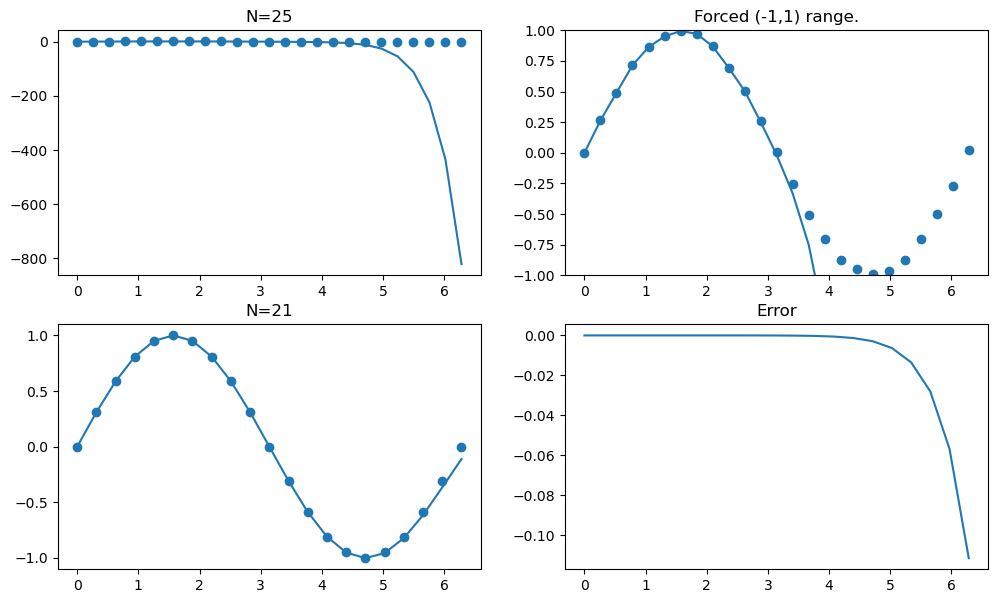

In [10]:
from scipy.interpolate import lagrange

np.random.seed(4)
N = 25
# number of points
X = np.linspace(0, 2*np.pi, N)
# Lagrange interpolation points - regular grid.
Y = np.sin(X) + 0.01 * np.random.randn(len(X))

# (Lagrange) interpolation
fn_lagrange_interpol = lagrange(X, Y)


fig, ax = plt.subplots(2, 2, figsize=(12, 7))
ax00 = ax[0,0]
ax00.scatter(X, Y)
ax00.plot(X, fn_lagrange_interpol(X))
ax00.set_title("N=25")

ax01 = ax[0,1]
ax01.scatter(X, Y)
ax01.plot(X, fn_lagrange_interpol(X))
ax01.set_ylim(-1, 1)
ax01.set_title("Forced (-1,1) range.")

N = 21
# number of points
X = np.linspace(0, 2*np.pi, N)
# Lagrange interpolation points - regular grid.
Y = np.sin(X)
fn_lagrange_interpol = lagrange(X, Y)


ax10 = ax[1,0]
ax10.scatter(X, Y)
ax10.plot(X, fn_lagrange_interpol(X))
ax10.set_title("N=21")

ax11 = ax[1,1]
#ax11.scatter(X, Y)
ax11.plot(X, fn_lagrange_interpol(X) - Y)
#ax11.set_ylim(-1, 1)
ax11.set_title("Error")


In [3]:
### Čebyševovy polynomy - interpolace

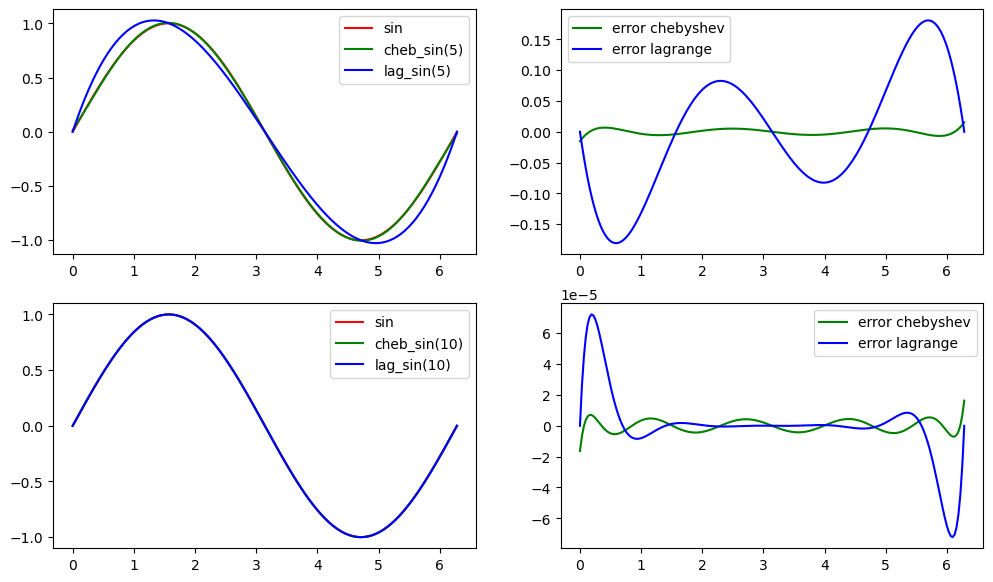

In [11]:
import numpy as np
import numpy.linalg as la
import numpy.polynomial as poly
import matplotlib.pyplot as plt


from scipy.interpolate import lagrange


def cheb_sin(deg):
    # Make approximation by Chebychev polynomial.
    x_sample = np.linspace(0, 2*np.pi, 100*deg)
    y_sample = np.sin(x_sample)
    #A = poly.chebyshev.chebvander(x_sample, len(x_sample)-1)
    #c = la.solve(A, y_sample)
    c = poly.chebyshev.chebfit(x_sample, y_sample, deg)
    return poly.Chebyshev(c)
    
def lag_sin(deg):
    # Make Lagrange interpolation.
    
    X = np.linspace(0, 2*np.pi, deg)
    Y = np.sin(X)
    return lagrange(X, Y)

fig,ax  = plt.subplots(2, 2, figsize=(12, 7))

# 5 interpolation points, polynom degree 5
# 10 interpolation points, polynom degree 10
# Works well since sin(x) have all derivatives bounded, C infinity function
for i_row, degree in enumerate([5,10]):
    func_cheb = cheb_sin(degree)
    func_lag = lag_sin(degree)
    x=np.linspace(0, 2*np.pi, 200)
    ax_sin, ax_err = ax[i_row]
    ax_sin.plot(x, np.sin(x), c='r', label='sin')
    ax_sin.plot(x, func_cheb(x), c='g', label='cheb_sin({})'.format(degree))
    ax_sin.plot(x, func_lag(x), c='b', label='lag_sin({})'.format(degree))
    ax_sin.legend()
    ax_err.plot(x, np.sin(x) - func_cheb(x), c='g', label='error chebyshev')
    ax_err.plot(x, np.sin(x) - func_lag(x), c='b', label='error lagrange')
    ax_err.legend()
plt.show()


## Spline interpolation

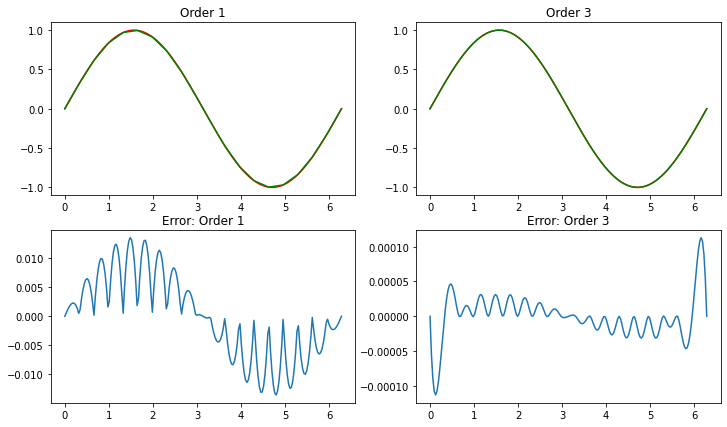

In [25]:
import scipy.interpolate as interpolate

def spline_sin(N, deg):
    x_sample = np.linspace(0, 2*np.pi, N)
    y_sample = np.sin(x_sample)
    return interpolate.interp1d(x_sample, y_sample, kind=deg)
    
fig,ax  = plt.subplots(2, 2, figsize=(12, 7))
    
# 10 interpolation points, order 1    
i_func = spline_sin(20,1)    
x=np.linspace(0, 2*np.pi, 200)
ax[0][0].plot(x, np.sin(x), c='r')
ax[0][0].plot(x, i_func(x), c='g')
ax[0][0].set_title("Order 1")
ax[1][0].plot(x, np.sin(x) - i_func(x))
ax[1][0].set_title("Error: Order 1")

# 10 interpolation points, order 3    
i_func = spline_sin(20,3)
ax[0][1].plot(x, np.sin(x), c='r')
ax[0][1].plot(x, i_func(x), c='g')
ax[0][1].set_title("Order 3")
ax[1][1].plot(x, np.sin(x) - i_func(x))
ax[1][1].set_title("Error: Order 3")
plt.show()

## 2d approximations

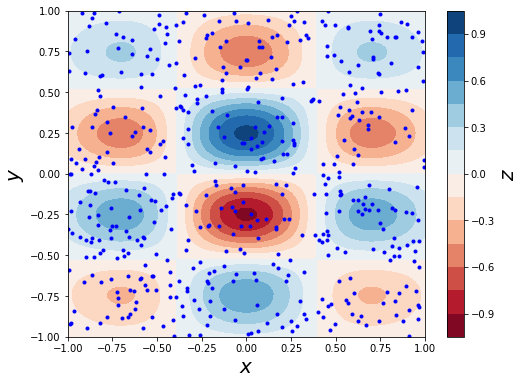

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Test bivariate function
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

# random 2d sample points
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
# samples
zdata = f(xdata, ydata)

# Plot function and sample points
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.', c='b')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)
plt.show()

(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


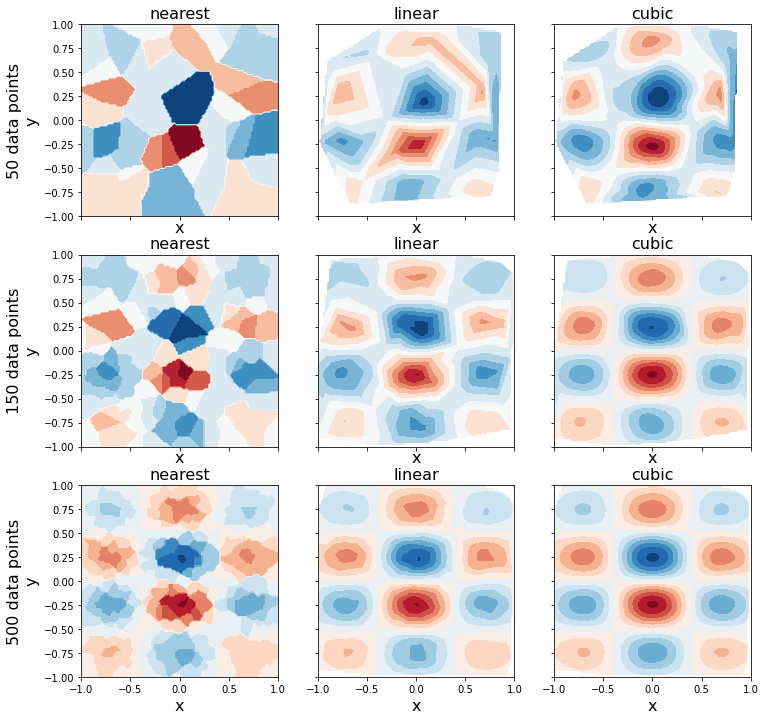

In [30]:
import scipy.interpolate as interpolate
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

def z_interpolate(xdata, ydata, zdata):
    """
    Interpolate unstructured samples to super sampled structured grid
    """
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    
    return Zi_0, Zi_1, Zi_3

# Plot resulting interpolant for increasing number of sample points.
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    print(X.shape, Y.shape, Zi_0.shape)
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

    for m in range(len(n_vec)):
        axes[idx, m].set_xlabel("x", fontsize=16)
    
plt.show()    


/tmp/ipykernel_55453/21612043.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color='black')
/tmp/ipykernel_55453/21612043.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(10000, 2)


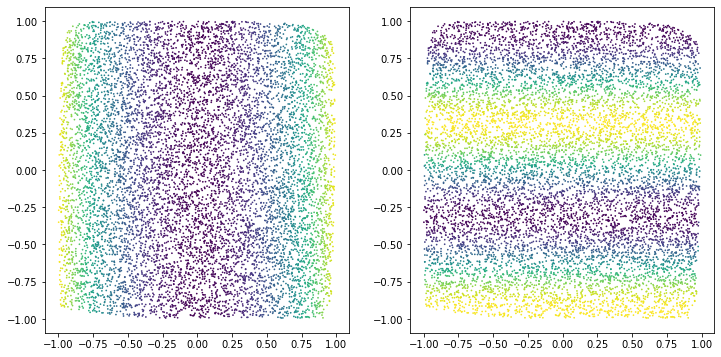

In [35]:
import matplotlib
cmap = matplotlib.cm.viridis
cmap.set_bad(color='black')

points = np.array([xdata, ydata]).T
values = np.array([xdata**2, np.sin(5*ydata)]).T
func = interpolate.CloughTocher2DInterpolator(points, values)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

X = np.random.uniform(-1, 1, 10000)
Y = np.random.uniform(-1, 1, 10000)
F = func(np.array([X,Y]).T)

print(F.shape)
# Plot first and second component of the vectro valued function
ax0.scatter(X,Y, c=F[:, 0], cmap=cmap, s=0.5)
ax1.scatter(X,Y, c=F[:,1], cmap=cmap, s=0.5)
fig.show()

# 2.3.2 Optimalizace a řešení rovnic 


### Optimization, non-linear least squares

In [37]:
import scipy.optimize as opt

# Parametric non-linear model
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

# Artificial data with noise.
xdata = np.linspace(0, 5, 50)
beta = (0.25, 0.75, 0.5)
print("Exact parameters: ", beta)
y = f(xdata, *beta)
ydata = y + 0.005 * np.random.randn(len(xdata))

# Misfit function
def g(beta):
    return ydata - f(xdata, *beta)

beta_start = (1, 1, 1)
beta_opt, beta_cov = opt.leastsq(g, beta_start)
print("Least sqr. parameters: ", beta_opt)
print("Least sqr. cov: ", beta_cov)

Exact parameters:  (0.25, 0.75, 0.5)
Least sqr. parameters:  [0.25096894 0.75218346 0.50585027]
Least sqr. cov:  1


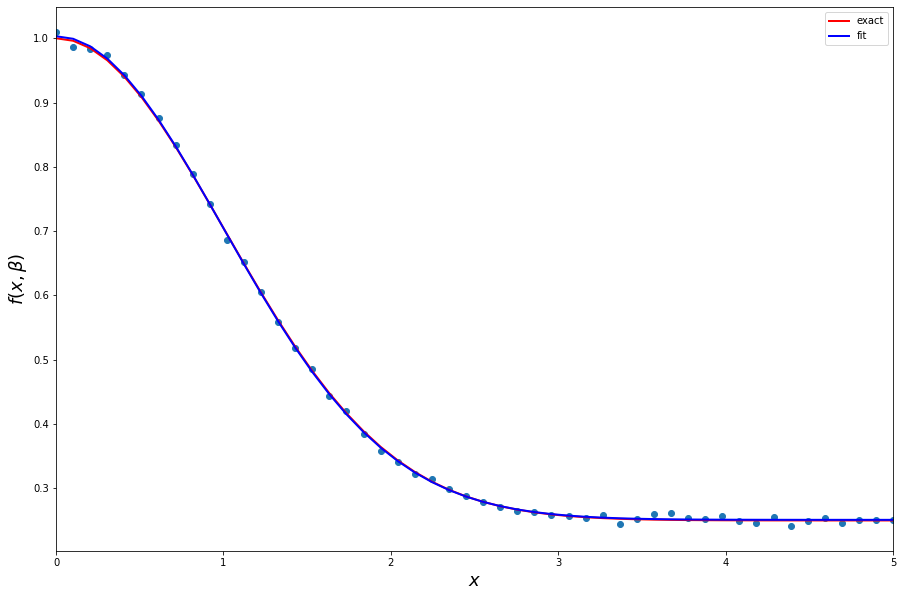

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
# Plot data
ax.scatter(xdata, ydata)
# Plot exact func
ax.plot(xdata, y, 'r', lw=2, label='exact')
# Plot fit
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fit')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
plt.show()


In [ ]:
help(opt.root)


## Polynom from roots

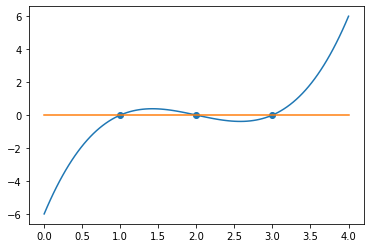

In [40]:
import numpy.polynomial as poly

roots = [1,2,3]
p = poly.Polynomial.fromroots(roots)
x=np.linspace(0,4,100)
plt.plot(x, p(x))
plt.plot(x, np.zeros_like(x))
plt.scatter(roots, np.zeros_like(roots))

In [41]:
# Under sampling (WIP)
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

# Test bivariate function
def f(x, y):
    return np.exp(-x*x - y*y) * np.cos(4*x) * np.sin(6*y)

# Many samples
N = 50
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

# sparse regular grid
x = y = np.linspace(-1, 1, 0.5)
X, Y = np.meshgrid(x, y)
# Interpolate from unstructured to sparse structured grid
z_regular = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
print(z_regular)
# Construct interpolant on structured grid
f_interp = interpolate.interp2d(x, y, z_regular, kind='cubic')

# Evaluate interpolant, error from function and error from samples
# on plotting grid.
x = y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)
Xr = X.flatten()
Yr = Y.flatten()
Z_func = f(Xr,Yr)


Zi = f_interp(x, y)
#print(Zi)
Z_err_f = Z_func.reshape(len(x), len(x)) - Zi
#Z_err_sample = zdata - f_interp(xdata, ydata)

#print(X.shape, Y.shape, Zi.shape)
# Plots
#fig, axes = plt.subplots(1, 3, figsize=(12, 12), sharex=True, sharey=True)
plt.contourf(X, Y, Zi, 15, cmap=plt.cm.RdBu)
#axes[0, 0].set_title("Interpolant", fontsize=16)
#axes[0, 1].imshow(Zerr_f, cmap=plt.cm.RdBu, interpolation='linear')
#axes[0, 1].set_title("Interpolant - function error", fontsize=16)
#axes[0, 1].scatter(xdata, ydata, c=Z_err_sample, cmap=plt.cm.RdBu)
#axes[0, 1].set_title("Interpolant - samples error", fontsize=16)
    
plt.show()    



TypeError: 'float' object cannot be interpreted as an integer

# 2.3.3 Numerická integrace ODE

### Skákající míček

Lineární pohyb v proměnné $x$:
$$ x(t) = v_x t $$
... $v_x$ je daná horizontální rychlost.

Gravitační síla pro míček ve vzduchu:
$$ y''(t) = -g \text{ pro } y(t) > R$$
... $g$ je gravitační zrychlení.

Elastická síla působí na míček dotýkající se podložky:
$$ y''(t) = k(R - y(t)) \text{ pro } y(t) < R$$
... $R$ je poloměr míčku, $k$ je elastický koeficient míčku, volíme výrazně větší než $g$.

Postup řešení:
- Skalární rovnici druhého řádu pro $y$ převeďte na soustavu rovnic prvního řádu pro $y$ a $y'$.
- Implementujte python funkci pro vyhodnocení působící síly:

  ```
        def force(t, y):
            y_0, y_1 = y                 # y - je dvou složkový numpy vektor 
            ...
            return np.array([f_0, f_1])  # vrací se též numpy vektor, f_0 bude nula            
  ```
- použijte scipy.integrate.solve_ivp pro řešení rovnice
- zobrazte trajektorii míčku pomocí matplotlib



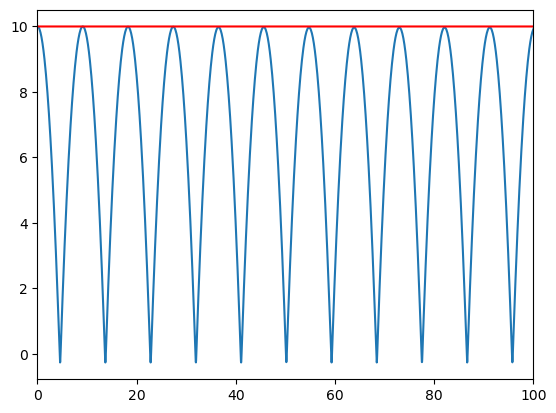

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
# Bouncing ball, with spring bounce


def ode_func(t, y):
    heigh, velocity = y
    force = -1
    stiffness = 300
    if heigh < 0:
        # check for bounce
        # use a spring bounce, not the instant bounce
        force += stiffness * abs(heigh)
    dy = [velocity, force]
    return dy

t0 = 0
t_end = 100
y0 = [10, 0]

# default setting not to precise
#result = integrate.solve_ivp(ode_func, (t0, t_end), y0)

# try strict tolerances - no improvement
#result = integrate.solve_ivp(ode_func, (t0, t_end), y0, max_step=0.1)

# limit timestep - pretty good
m = 'Radau'
#m = 'RK23'
#m = 'RK45'
#m = 'DOP853'
#m = 'BDF'
#m = 'LSODA'
result = integrate.solve_ivp(ode_func, (t0, t_end), y0, max_step=0.1, method = m)

def plot_jumps(t, y):
    plt.plot(t, y[0, :])
    max_y = y0[0] * np.ones_like(t)
    plt.plot(t, max_y, c='r')
    plt.xlim([0,t_end])
    plt.show()

plot_jumps(result.t, result.y)

Výsledek vypadá dobře, ale zkusme delší časový interval.

... nefyzikálně nám roste energie.

Zkuste také zvýšit tuhost míčku `stiffness = 300`

... odraz není dobře zachycen a energie míčku kolísá.

Zkusme tedy jinou metodu: method = 'RK23'. To je metoda nižšího řádu, čekáme horší výsledek...

...    skutečně nyní energie výrazně klesá.

Další možné metody: 
- Radau : implicitní metoda, asi nepůjde bez zadaného jakobiánu ... 
  Kupodivu jde a je lepší, ale stále mírný pokles energie.
- BDF : Implicitní multistep metoda. Růst energie.
- LSODA : Implicitní multistep metoda. Růst energie. 


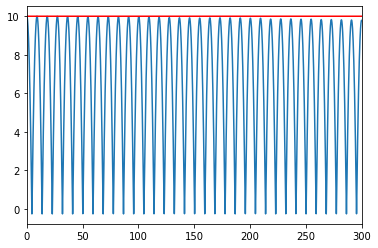

In [17]:
t_end = 300

# limit timestep - pretty good
result = integrate.solve_ivp(ode_func, (t0, t_end), y0, method= 'Radau', max_step=0.1)

plot_jumps(result.t, result.y)

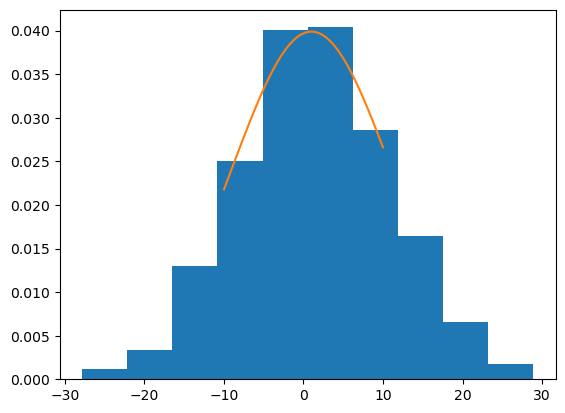

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt

norm = stats.norm(loc=1, scale=10)
X = norm.rvs(1000)

plt.hist(X, density=True)
x = np.linspace(-10,10)
plt.plot(x, norm.pdf(x) )
plt.show()

# Cvičení

1. Use `integrate.quad` to integrate function $f(x) = e^{-x^2}$ over $[-1,1]$
2. Use `special.ndtr` to the same end and compare the results.
3. Evaluate $f(x)$ on the grid of $N$ points.  Use `integrate.trapezoid` and `integrate.simpson` rules to approximate the integral. Plot the error as function of $N$.
4. Use root finding functions to find all three roots of $x^3-2x^2-11x+12$. How does root depend on intitial guess?
5. Try to find all three roots (complex) of $x^3 = 1$.
6. Apply smoothing of a noisy data `noisy` by the convolution with a Gaussian kernel `signal.gaussian`. Use `fft` and Fourier transform identity:

$$
f \star g = \mathcal{F}^{-1}\Big(\,\mathcal{F}(f)\,\mathcal{F}(g)\,\Big)
$$



In [ ]:
def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

# Experimenty

### Newton method convergence regions - fractal

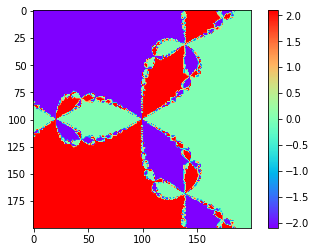

In [11]:
import matplotlib.pyplot as plt
import numpy as np

degree = 3
def newton(xy):
    z = complex(*xy)
    for i in range(255):
        fn = z ** degree - complex(1)
        fn_prime = degree * (z ** (degree - 1))
        z = z  - fn/fn_prime
    return np.angle(z) #np.round(degree * /2/np.pi)

side = np.linspace(-1,1, 200)
X, Y = np.meshgrid(side, side)
xy = np.stack((X,Y), axis=2)
Z = np.zeros_like(X)
Z = np.apply_along_axis(newton, 2, xy)
#print(Z)    
    
plt.imshow(Z, cmap='rainbow')
plt.colorbar()
plt.show()

### Domains of convergence for other root fiding methods

/tmp/ipykernel_54543/1432493215.py:27: OptimizeWarning: Unknown solver options: maxiter
  res = opt.root(fun, z0_ar, method='hybr', options = dict(maxiter=20))


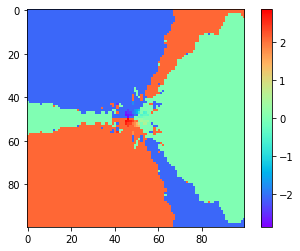

In [12]:
# Solving equation `z^n == 1` in complex numbers, using Newton's method
import scipy.optimize as opt

degree = 3


def fun(x):
    # f(z) = z^degree - 1
    re, im = x
    z = complex(re, im)
    fz = z**degree - 1
    return [fz.real, fz.imag ]

def fprime(x):
    # f'(z) complex function derivative -> Jacobian matrix
    re, im = x
    z = complex(re, im)
    dfdz = degree*z**(degree - 1)
    return [[ dfdz.real, dfdz.imag], [-dfdz.imag, dfdz.real ]]
    
def get_root(z0_ar):
    # There are 'degree' roots. Return index of the clossest root to the result.
    #res = opt.root(fun, z0_ar, method='linearmixing', options = dict(maxiter=20))
    # More regular domains for the standard solver: Powell hybrid method from MINPACK
    # other methods: 'hybr', 'lm', 'broyden1', 'broyden2', 'anderson', 'linearmixing', 
    # 'diagbroyden', 'excitingmixing', 'krylov', 'df-sane'
    res = opt.root(fun, z0_ar, method='hybr', options = dict(maxiter=20))
    # Still fractal for Levenberg-Marquardt
    re, im = res.x
    
    #re, im = opt.fsolve(fun, z0_ar, fprime=fprime)
    #re, im = opt.fsolve(fun, z0_ar, maxfev=20)
    return np.angle(complex(re, im))

import matplotlib.pyplot as plt
import numpy as np

side = np.linspace(-2,2, 100)
X, Y = np.meshgrid(side, side)
xy = np.stack((X,Y), axis=2)
Z = np.zeros_like(X)

Z = np.apply_along_axis(get_root, 2, xy)
#print(Z)    
    
plt.imshow(Z, cmap='rainbow', interpolation='nearest')
plt.colorbar()
plt.show()


In [ ]:
import scipy.optimize as opt
import matplotlib.pyplot as plt

def fn(x):
    return x*(x*(x-2)-11)+12

X = np.linspace(-5, 5, 100)
plt.plot(X, fn(X))

Y = [opt.root(fn, x0=x0).x for x0 in X]
plt.twinx()
plt.ylim(-5,5)
plt.plot(Y, X,c='orange')